
# Weather in Australia - Rain Prediction Project

**Name:** Krollos Ayad  
**Course:** Machine Learning - Session 3  

---

## Objective
Build and evaluate a Logistic Regression model to predict whether it will rain tomorrow (RainTomorrow)
using the Weather Australia dataset.

This project includes:
- Exploratory Data Analysis (EDA)
- Data Cleaning
- Feature Engineering
- Encoding
- Feature Scaling
- Logistic Regression
- Full Classification Metrics (Confusion Matrix, Accuracy, Precision, Recall, F1, ROC-AUC)


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1. Load Dataset

In [2]:

df = pd.read_csv("weatherAUS.csv")
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## 2. Exploratory Data Analysis (EDA)

In [4]:

df["RainTomorrow"].value_counts()


RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

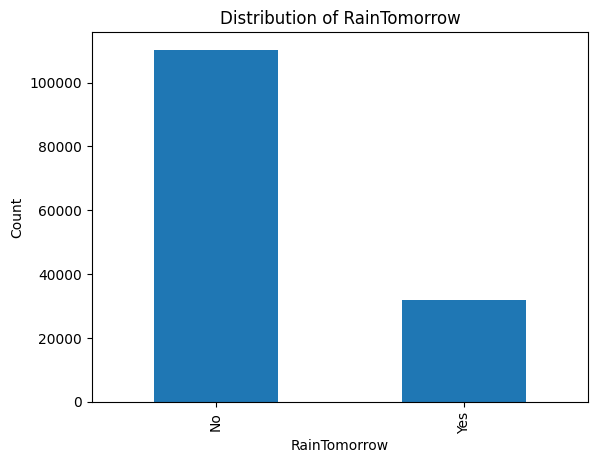

In [5]:

df["RainTomorrow"].value_counts().plot(kind="bar")
plt.title("Distribution of RainTomorrow")
plt.xlabel("RainTomorrow")
plt.ylabel("Count")
plt.show()


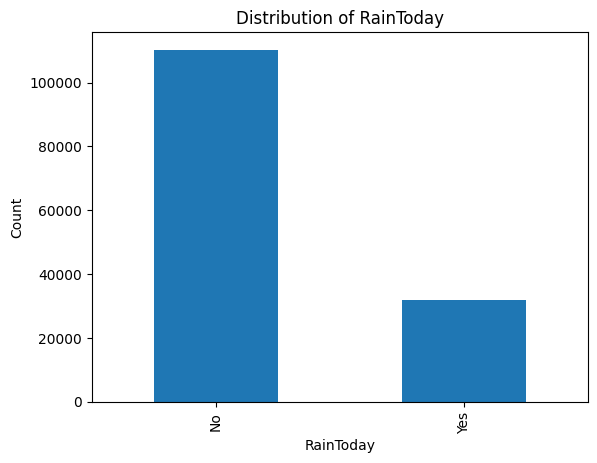

In [6]:

df["RainToday"].value_counts().plot(kind="bar")
plt.title("Distribution of RainToday")
plt.xlabel("RainToday")
plt.ylabel("Count")
plt.show()


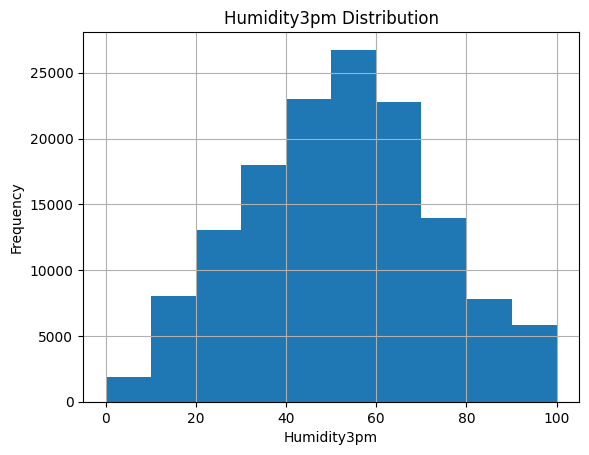

In [7]:

df["Humidity3pm"].hist()
plt.title("Humidity3pm Distribution")
plt.xlabel("Humidity3pm")
plt.ylabel("Frequency")
plt.show()


## 3. Data Cleaning

In [8]:

df = df.drop(columns=["Sunshine","Evaporation","Cloud3pm","Cloud9am"], errors='ignore')

for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum().sum()


0

## 4. Feature Engineering

In [9]:

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df = df.drop(columns=["Date"])


## 5. Encoding

In [10]:

df["RainTomorrow"] = df["RainTomorrow"].map({"Yes":1,"No":0})
df["RainToday"] = df["RainToday"].map({"Yes":1,"No":0})

df = pd.get_dummies(df, drop_first=True)
df.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,False,True,False,False,False,False,False,False,False,False


## 6. Train-Test Split

In [11]:

from sklearn.model_selection import train_test_split

X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 7. Feature Scaling

In [12]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 8. Logistic Regression Model

In [13]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


## 9. Evaluation Metrics

In [14]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[21551  1121]
 [ 3383  3037]]

Accuracy:
0.8451808057197855

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     22672
           1       0.73      0.47      0.57      6420

    accuracy                           0.85     29092
   macro avg       0.80      0.71      0.74     29092
weighted avg       0.83      0.85      0.83     29092



## 10. ROC Curve & AUC

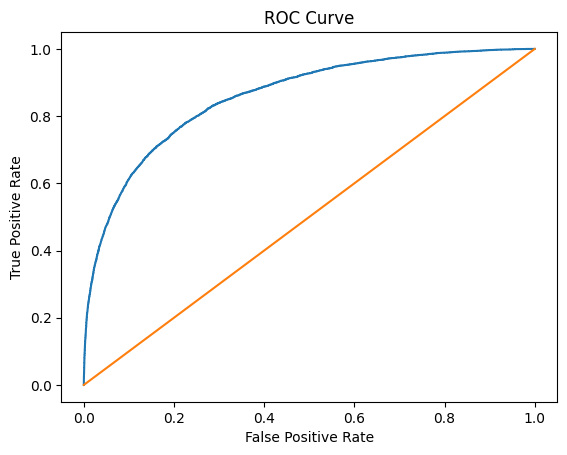

AUC Score: 0.8586641172390443


In [15]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC Score:", roc_auc)
